In [ ]:
Model 1

In [1]:

import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

Using TensorFlow backend.


Importing all necessary libraries for model creation, confussion matirx, classification report generation and others.

In [2]:
#Dimensions 
img_width, img_height = 150, 150
   
#Create a bottleneck file
top_model_weights_path = 'vgg19_Exp1.h5' 

# loading up our datasets
train_data_dir = r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\Training_Exp1'
validation_data_dir =  r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\Validation_Exp1'
test_data_dir =r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Testing'

   
# number of epochs to train top model  
epochs = 65 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 32

Setting the constant value like dimention of image, training, validation and testing paths, number of epoch and batch size.

In [3]:
#Loading vgg19 model
vgg19 = applications.VGG19(include_top=False, weights='imagenet')

Download vgg19 model to use the pretrained model weight from imagenet.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files
datagen_2=ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Using ImageDataGenerator function for data augmentation purpose.

In [5]:
#Creating weight with vgg19
#__this can take few minutes to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen_2.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg19.predict_generator(generator, predict_size_train)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\bottleneck_features_train_1.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 656 images belonging to 2 classes.
Time:  0:07:00.694156


In [6]:
#__this can take few minutes to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg19.predict_generator(  
     generator, predict_size_validation)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\bottleneck_features_validation_1.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 164 images belonging to 2 classes.
Time:  0:01:34.904715


In [7]:
#__this can take few minutes to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg19.predict_generator(  
     generator, predict_size_test)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\bottleneck_features_test_1.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 206 images belonging to 2 classes.
Time:  0:02:11.369496


In [8]:
#training data
generator_top = datagen_2.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\bottleneck_features_train_1.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 656 images belonging to 2 classes.


In [9]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\bottleneck_features_validation_1.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 164 images belonging to 2 classes.


In [10]:
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\bottleneck_features_test_1.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 206 images belonging to 2 classes.


In [11]:
#Training the model
#This is the model architecture
from tensorflow.keras import regularizers
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=20,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 656 samples, validate on 164 samples
Epoch 1/20
656/656 [==============================] - 1s 2ms/step - loss: 0.8080 - acc: 0.5335 - val_loss: 0.6169 - val_acc: 0.7317
Epoch 2/20
656/656 [==============================] - 0s 613us/step - loss: 0.7070 - acc: 0.5640 - val_loss: 0.5863 - val_acc: 0.7622
Epoch 3/20
656/656 [==============================] - 0s 628us/step - loss: 0.6826 - acc: 0.5991 - val_loss: 0.5503 - val_acc: 0.7927
Epoch 4/20
656/656 [==============================] - 0s 651us/step - loss: 0.6187 - acc: 0.6646 - val_loss: 0.5239 - val_acc: 0.7866
Epoch 5/20
656/656 [==============================] - 0s 700us/step - loss: 0.5764 - acc: 0.6799 - val_loss: 0.4940 - val_acc: 0.8110
Epoch 6/20
656/656 [==============================] - 0s 620us/step - loss: 0.5423 - acc: 0.7149 - val_loss: 0.4749 - val_acc: 0.8110
Epoch 7/20
656/656 [==============================] - 0s 624us/step - loss: 0.5112 - acc: 0.7485 - val_loss: 0.4532 - val_acc: 0.7927
Epoch 8/20
656/656

In [12]:
#Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               819300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 829,602
Trainable params: 829,602
Non-trainable params: 0
________________________________________________

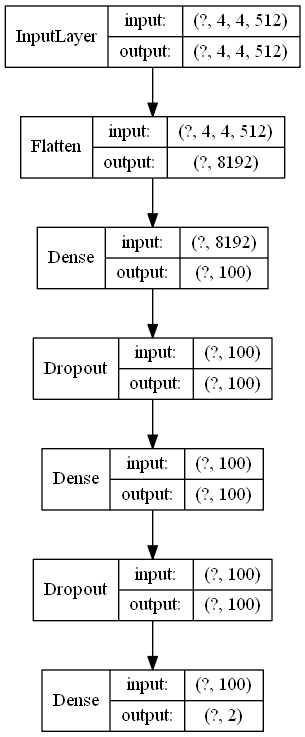

In [13]:
from tensorflow.keras.utils import  plot_model
plot_model(model, to_file=r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp1\vgg19.png', show_shapes=True, show_layer_names=False)


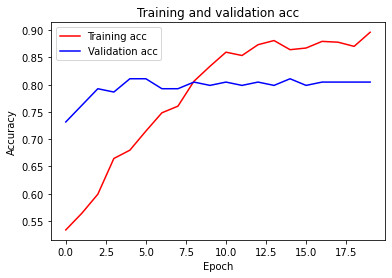

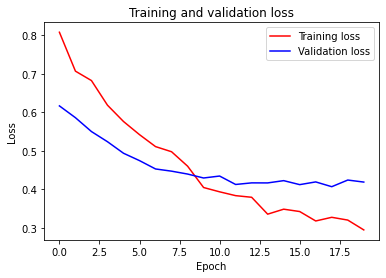

In [14]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
#Model evaluation on testing set
model.evaluate(test_data, test_labels)

206/206 [==============================] - 0s 818us/step


[0.7459813366526539, 0.6310679316520691]

In [16]:
#Classification metrics and confussion matrix
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[0.078134   0.         0.         ... 0.         1.1874962
    0.        ]
   [0.41883126 0.         0.         ... 0.         0.9182231
    0.        ]
   [1.441164   0.         0.43633756 ... 0.07787611 0.77222276
    0.        ]
   [0.7430471  0.         0.05845895 ... 0.         0.9239475
    0.        ]]

  [[0.         0.         0.15536386 ... 0.         1.0035914
    0.        ]
   [1.2744863  0.         0.7193092  ... 0.         0.2836828
    0.        ]
   [2.0711021  0.         0.82883424 ... 0.13840789 0.63107646
    0.        ]
   [1.4677839  0.         0.4925207  ... 0.         0.94388175
    0.        ]]

  [[0.46162793 0.         0.307761   ... 0.         0.3788005
    0.        ]
   [0.78380907 0.         0.55974853 ... 0.         0.
    0.        ]
   [0.40790197 0.         0.         ... 0.         0.16822714
    0.        ]
   [0.         0.         0.05005324 ... 0.         0.18655479
    0.        ]]

  [[0.42519373 0.         0.         ... 0.       

In [17]:
plants = ['Healthy', 'Late_Blight']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=plants )
print(classification_metrics)

              precision    recall  f1-score   support

     Healthy       0.97      0.27      0.42       103
 Late_Blight       0.58      0.99      0.73       103

   micro avg       0.63      0.63      0.63       206
   macro avg       0.77      0.63      0.58       206
weighted avg       0.77      0.63      0.58       206
 samples avg       0.63      0.63      0.63       206



In [18]:
#Testing image on a model

def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(150, 150))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [19]:
def test_single_image(path):
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg19.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, plant, x in zip(range(0,2), plants , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, plant, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

In [20]:
path1=r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Testing\Late_Blight\Late_Blight (354).JPG'


[INFO] loading and preprocessing image...
ID: 0, Label: Healthy 7.27%
ID: 1, Label: Late_Blight 92.73%
Final Decision:
.
..
...
ID: 1, Label: Late_Blight


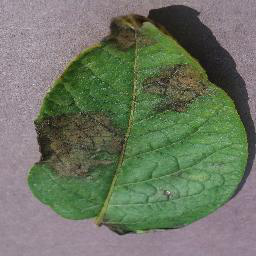

In [21]:
test_single_image(path1)

In [22]:
print("Testing loss and accuary\n")
model.evaluate(test_data, test_labels)

Testing loss and accuary

206/206 [==============================] - 0s 170us/step


[0.7459813366526539, 0.6310679316520691]

In [ ]:
Model 2

In [23]:
#Dimensions 
img_width, img_height = 150, 150
   
#Create a bottleneck file
top_model_weights_path = 'vgg19_Exp2.h5' 

# loading up our datasets
train_data_dir2 = r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp2\Training_Exp2'
validation_data_dir2 =  r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp2\Validation_Exp2'
test_data_dir2 =r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Testing'

   
# number of epochs to train top model  
epochs2 = 65 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size2 = 32

In [24]:
#Creating weight with vgg19
#__this can take few minutes to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen_2.flow_from_directory(  
     train_data_dir2,  
     target_size=(img_width, img_height),  
     batch_size=batch_size2,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size2))  
   
bottleneck_features_train = vgg19.predict_generator(generator, predict_size_train)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp2\bottleneck_features_train_2.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 656 images belonging to 2 classes.
Time:  0:07:14.225186


In [25]:
#__this can take few minutes so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir2,  
     target_size=(img_width, img_height),  
     batch_size=batch_size2,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size2))  
   
bottleneck_features_validation = vgg19.predict_generator(  
     generator, predict_size_validation)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp2\bottleneck_features_validation_2.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 164 images belonging to 2 classes.
Time:  0:01:24.954446


In [26]:
#__this can take few minutes to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir2,  
     target_size=(img_width, img_height),  
     batch_size=batch_size2,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size2))  
   
bottleneck_features_test = vgg19.predict_generator(  
     generator, predict_size_test)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp2\bottleneck_features_test_2.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 206 images belonging to 2 classes.
Time:  0:01:55.848123


In [27]:
#training data
generator_top = datagen_2.flow_from_directory(  
         train_data_dir2,  
         target_size=(img_width, img_height),  
         batch_size=batch_size2,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data2 = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp2\bottleneck_features_train_2.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels2 = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels2 = to_categorical(train_labels2, num_classes=num_classes)

Found 656 images belonging to 2 classes.


In [28]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir2,  
         target_size=(img_width, img_height),  
         batch_size=batch_size2,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data2 = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp2\bottleneck_features_validation_2.npy')  
   

validation_labels2 = generator_top.classes  
validation_labels2 = to_categorical(validation_labels2, num_classes=num_classes)

Found 164 images belonging to 2 classes.


In [29]:
generator_top = datagen.flow_from_directory(  
         test_data_dir2,  
         target_size=(img_width, img_height),  
         batch_size=batch_size2,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data2= np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp2\bottleneck_features_test_2.npy')  
   

test_labels2 = generator_top.classes  
test_labels2 = to_categorical(test_labels2, num_classes=num_classes)

Found 206 images belonging to 2 classes.


In [30]:
#Training the model
#This is the model architecture
from tensorflow.keras import regularizers
start = datetime.datetime.now()
model2 = Sequential()  
model2.add(Flatten(input_shape=train_data.shape[1:]))  
model2.add(Dense(100, activation='relu'))  
model2.add(Dropout(0.5))  
model2.add(Dense(100, activation='relu'))  
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))  

model2.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])  

history2 = model2.fit(train_data2, train_labels2,  
      epochs=20,
      batch_size=batch_size2,  
      validation_data=(validation_data2, validation_labels2))  

model2.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model2.evaluate(  
 validation_data2, validation_labels2, batch_size=batch_size2, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 656 samples, validate on 164 samples
Epoch 1/20
656/656 [==============================] - 1s 972us/step - loss: 0.7788 - acc: 0.5198 - val_loss: 0.6064 - val_acc: 0.7683
Epoch 2/20
656/656 [==============================] - 0s 605us/step - loss: 0.7026 - acc: 0.5701 - val_loss: 0.5536 - val_acc: 0.9695
Epoch 3/20
656/656 [==============================] - 0s 666us/step - loss: 0.6619 - acc: 0.6159 - val_loss: 0.5041 - val_acc: 0.9817
Epoch 4/20
656/656 [==============================] - 0s 637us/step - loss: 0.6735 - acc: 0.5884 - val_loss: 0.4620 - val_acc: 0.9939
Epoch 5/20
656/656 [==============================] - 0s 649us/step - loss: 0.6045 - acc: 0.6845 - val_loss: 0.4121 - val_acc: 0.9939
Epoch 6/20
656/656 [==============================] - 0s 655us/step - loss: 0.5929 - acc: 0.6662 - val_loss: 0.3658 - val_acc: 0.9878
Epoch 7/20
656/656 [==============================] - 0s 647us/step - loss: 0.5558 - acc: 0.7256 - val_loss: 0.3191 - val_acc: 0.9939
Epoch 8/20
656/6

In [31]:
#Model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               819300    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 829,602
Trainable params: 829,602
Non-trainable params: 0
________________________________________________

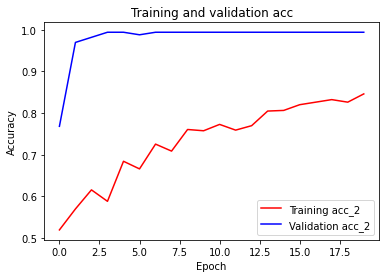

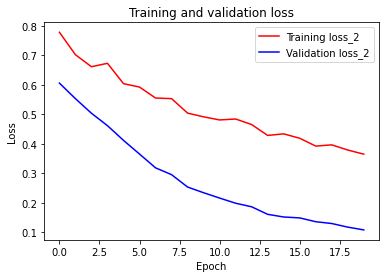

In [32]:
#Graphing our training and validation
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc2, 'r', label='Training acc_2')
plt.plot(epochs, val_acc2, 'b', label='Validation acc_2')
plt.title('Training and validation acc')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'r', label='Training loss_2')
plt.plot(epochs, val_loss2, 'b', label='Validation loss_2')
plt.title('Training and validation loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [33]:
#Model evaluation on testing set
model2.evaluate(test_data2, test_labels2)

206/206 [==============================] - 0s 155us/step


[0.6396802699970967, 0.6359223127365112]

In [34]:
#Classification metrics and confussion matrix
print('test data', test_data2)
preds2 = np.round(model2.predict(test_data2),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds2)

test data [[[[0.078134   0.         0.         ... 0.         1.1874962
    0.        ]
   [0.41883126 0.         0.         ... 0.         0.9182231
    0.        ]
   [1.441164   0.         0.43633756 ... 0.07787611 0.77222276
    0.        ]
   [0.7430471  0.         0.05845895 ... 0.         0.9239475
    0.        ]]

  [[0.         0.         0.15536386 ... 0.         1.0035914
    0.        ]
   [1.2744863  0.         0.7193092  ... 0.         0.2836828
    0.        ]
   [2.0711021  0.         0.82883424 ... 0.13840789 0.63107646
    0.        ]
   [1.4677839  0.         0.4925207  ... 0.         0.94388175
    0.        ]]

  [[0.46162793 0.         0.307761   ... 0.         0.3788005
    0.        ]
   [0.78380907 0.         0.55974853 ... 0.         0.
    0.        ]
   [0.40790197 0.         0.         ... 0.         0.16822714
    0.        ]
   [0.         0.         0.05005324 ... 0.         0.18655479
    0.        ]]

  [[0.42519373 0.         0.         ... 0.       

In [35]:
plants = ['Healthy', 'Late_Blight']
classification_metrics2 = metrics.classification_report(test_labels2, preds2, target_names=plants )
print(classification_metrics2)

              precision    recall  f1-score   support

     Healthy       1.00      0.27      0.43       103
 Late_Blight       0.58      1.00      0.73       103

   micro avg       0.64      0.64      0.64       206
   macro avg       0.79      0.64      0.58       206
weighted avg       0.79      0.64      0.58       206
 samples avg       0.64      0.64      0.64       206



In [ ]:
Model 3

In [36]:
#Dimensions 
img_width, img_height = 150, 150
   
#Create a bottleneck file
top_model_weights_path = 'vgg19_Exp3.h5' 

# loading up our datasets
train_data_dir3 = r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp3\Training_Exp3'
validation_data_dir3 =  r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp3\Validation_Exp3'
test_data_dir3 =r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Testing'

   
# number of epochs to train top model  
epochs3 = 65 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size3 = 32

In [37]:
#Creating weight with vgg19
#__this can take few minutes to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen_2.flow_from_directory(  
     train_data_dir3,  
     target_size=(img_width, img_height),  
     batch_size=batch_size3,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size3))  
   
bottleneck_features_train = vgg19.predict_generator(generator, predict_size_train)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp3\bottleneck_features_train_3.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 656 images belonging to 2 classes.
Time:  0:06:02.551781


In [38]:
#__this can take few minutes to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir3,  
     target_size=(img_width, img_height),  
     batch_size=batch_size3,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size3))  
   
bottleneck_features_validation = vgg19.predict_generator(  
     generator, predict_size_validation)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp3\bottleneck_features_validation_3.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 164 images belonging to 2 classes.
Time:  0:01:21.202034


In [39]:
#__this can take few minutes  to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir3,  
     target_size=(img_width, img_height),  
     batch_size=batch_size3,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size3))  
   
bottleneck_features_test = vgg19.predict_generator(  
     generator, predict_size_test)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp3\bottleneck_features_test_3.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 206 images belonging to 2 classes.
Time:  0:01:43.683818


In [40]:
#training data
generator_top = datagen_2.flow_from_directory(  
         train_data_dir3,  
         target_size=(img_width, img_height),  
         batch_size=batch_size3,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data3 = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp3\bottleneck_features_train_3.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels3 = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels3 = to_categorical(train_labels3, num_classes=num_classes)

Found 656 images belonging to 2 classes.


In [41]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir3,  
         target_size=(img_width, img_height),  
         batch_size=batch_size3,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data3 = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp3\bottleneck_features_validation_3.npy')  
   

validation_labels3 = generator_top.classes  
validation_labels3 = to_categorical(validation_labels3, num_classes=num_classes)

Found 164 images belonging to 2 classes.


In [42]:
generator_top = datagen.flow_from_directory(  
         test_data_dir3,  
         target_size=(img_width, img_height),  
         batch_size=batch_size3,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data3= np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp3\bottleneck_features_test_3.npy')  
   

test_labels3 = generator_top.classes  
test_labels3 = to_categorical(test_labels3, num_classes=num_classes)

Found 206 images belonging to 2 classes.


In [43]:
#Training the model
#This is the model architecture
from tensorflow.keras import regularizers
start = datetime.datetime.now()
model3 = Sequential()  
model3.add(Flatten(input_shape=train_data.shape[1:]))  
model3.add(Dense(100, activation='relu'))  
model3.add(Dropout(0.5))  
model3.add(Dense(100, activation='relu'))  
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='softmax'))  

model3.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])  

history3 = model3.fit(train_data3, train_labels3,  
      epochs=20,
      batch_size=batch_size3,  
      validation_data=(validation_data3, validation_labels3))  

model3.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model3.evaluate(  
 validation_data3, validation_labels3, batch_size=batch_size3, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 656 samples, validate on 164 samples
Epoch 1/20
656/656 [==============================] - 1s 1ms/step - loss: 0.8675 - acc: 0.5046 - val_loss: 0.6380 - val_acc: 0.6890
Epoch 2/20
656/656 [==============================] - 1s 793us/step - loss: 0.7425 - acc: 0.5518 - val_loss: 0.5696 - val_acc: 0.8537
Epoch 3/20
656/656 [==============================] - 0s 756us/step - loss: 0.6693 - acc: 0.6113 - val_loss: 0.5167 - val_acc: 0.9329
Epoch 4/20
656/656 [==============================] - 1s 817us/step - loss: 0.6426 - acc: 0.6341 - val_loss: 0.4654 - val_acc: 0.9573
Epoch 5/20
656/656 [==============================] - 1s 817us/step - loss: 0.6002 - acc: 0.6738 - val_loss: 0.4306 - val_acc: 0.9451
Epoch 6/20
656/656 [==============================] - 1s 793us/step - loss: 0.5619 - acc: 0.7378 - val_loss: 0.3808 - val_acc: 0.9512
Epoch 7/20
656/656 [==============================] - 1s 841us/step - loss: 0.5245 - acc: 0.7287 - val_loss: 0.3518 - val_acc: 0.9573
Epoch 8/20
656/656

In [44]:
#Model summary
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               819300    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 202       
Total params: 829,602
Trainable params: 829,602
Non-trainable params: 0
________________________________________________

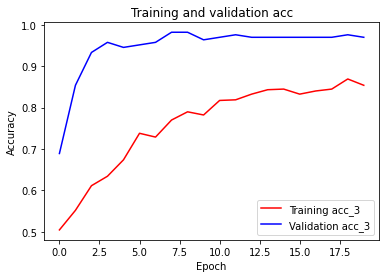

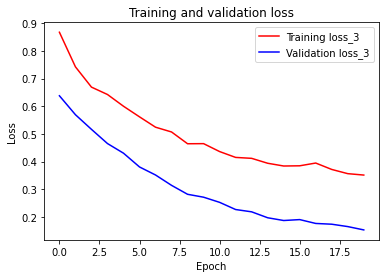

In [45]:
#Graphing our training and validation
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc3, 'r', label='Training acc_3')
plt.plot(epochs, val_acc3, 'b', label='Validation acc_3')
plt.title('Training and validation acc')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss3, 'r', label='Training loss_3')
plt.plot(epochs, val_loss3, 'b', label='Validation loss_3')
plt.title('Training and validation loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [46]:
#Model evaluation on testing set
model3.evaluate(test_data3, test_labels3)

206/206 [==============================] - 0s 233us/step


[0.5855526738953822, 0.6456310749053955]

In [47]:
#Classification metrics and confussion matrix
print('test data', validation_data3)
preds3 = np.round(model3.predict(test_data3),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds3)

test data [[[[1.03875875e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.02222359e+00 0.00000000e+00]
   [1.70354629e+00 0.00000000e+00 0.00000000e+00 ... 2.83976793e-01
    7.01138914e-01 0.00000000e+00]
   [1.65006602e+00 0.00000000e+00 5.20368218e-02 ... 6.70558155e-01
    8.55644524e-01 0.00000000e+00]
   [1.38197720e+00 0.00000000e+00 8.18446279e-02 ... 3.20546120e-01
    9.03064609e-01 0.00000000e+00]]

  [[1.08920574e+00 0.00000000e+00 1.95447132e-01 ... 3.37448925e-01
    1.25222707e+00 0.00000000e+00]
   [1.24884784e+00 0.00000000e+00 8.17366362e-01 ... 2.42982209e-02
    8.02138090e-01 0.00000000e+00]
   [1.21586692e+00 0.00000000e+00 8.63923073e-01 ... 1.12487927e-01
    6.63802505e-01 0.00000000e+00]
   [1.07431245e+00 0.00000000e+00 3.14865500e-01 ... 0.00000000e+00
    7.88614452e-01 0.00000000e+00]]

  [[1.23828578e+00 0.00000000e+00 7.21447170e-02 ... 4.48008567e-01
    9.33218479e-01 0.00000000e+00]
   [8.16851318e-01 0.00000000e+00 2.06540331e-01 ... 4.1923

rounded test_labels [[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]

In [48]:
plants = ['Healthy', 'Late_Blight']
classification_metrics3 = metrics.classification_report(test_labels3, preds3, target_names=plants )
print(classification_metrics3)

              precision    recall  f1-score   support

     Healthy       0.86      0.35      0.50       103
 Late_Blight       0.59      0.94      0.73       103

   micro avg       0.65      0.65      0.65       206
   macro avg       0.72      0.65      0.61       206
weighted avg       0.72      0.65      0.61       206
 samples avg       0.65      0.65      0.65       206



In [ ]:
Model 4

In [49]:
#Dimensions 
img_width, img_height = 150, 150
   
#Create a bottleneck file
top_model_weights_path = 'vgg19_Exp4.h5' 

# loading up our datasets
train_data_dir4 = r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp4\Training_Exp4'
validation_data_dir4 =  r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp4\Validation_Exp4'
test_data_dir4 =r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Testing'

   
# number of epochs to train top model  
epochs = 65 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size4 = 32

In [50]:
#Creating weight with vgg19
#__this can take few minitues to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen_2.flow_from_directory(  
     train_data_dir4,  
     target_size=(img_width, img_height),  
     batch_size=batch_size4,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size4))  
   
bottleneck_features_train = vgg19.predict_generator(generator, predict_size_train)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp4\bottleneck_features_train_4.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 656 images belonging to 2 classes.
Time:  0:05:04.918351


In [51]:
#__this can take few minutes to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir4,  
     target_size=(img_width, img_height),  
     batch_size=batch_size4,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size4))  
   
bottleneck_features_validation = vgg19.predict_generator(  
     generator, predict_size_validation)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp4\bottleneck_features_validation_4.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 164 images belonging to 2 classes.
Time:  0:01:05.277238


In [52]:
#__this can take few minutes to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir4,  
     target_size=(img_width, img_height),  
     batch_size=batch_size4,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size4))  
   
bottleneck_features_test = vgg19.predict_generator(  
     generator, predict_size_test)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp4\bottleneck_features_test_4.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 206 images belonging to 2 classes.
Time:  0:01:22.126471


In [56]:
#training data
generator_top = datagen_2.flow_from_directory(  
         train_data_dir4,  
         target_size=(img_width, img_height),  
         batch_size=batch_size4,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data4 = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp4\bottleneck_features_train_4.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels4 = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels4 = to_categorical(train_labels4, num_classes=num_classes)

Found 656 images belonging to 2 classes.


In [57]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir4,  
         target_size=(img_width, img_height),  
         batch_size=batch_size4,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data4 = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp4\bottleneck_features_validation_4.npy')  
   

validation_labels4 = generator_top.classes  
validation_labels4 = to_categorical(validation_labels4, num_classes=num_classes)

Found 164 images belonging to 2 classes.


In [58]:
generator_top = datagen.flow_from_directory(  
         test_data_dir4,  
         target_size=(img_width, img_height),  
         batch_size=batch_size4,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data4= np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp4\bottleneck_features_test_4.npy')  
   

test_labels4 = generator_top.classes  
test_labels4 = to_categorical(test_labels4, num_classes=num_classes)

Found 206 images belonging to 2 classes.


In [59]:
#Training the model
#This is the model architecture
from tensorflow.keras import regularizers
start = datetime.datetime.now()
model4 = Sequential()  
model4.add(Flatten(input_shape=train_data.shape[1:]))  
model4.add(Dense(100, activation='relu'))  
model4.add(Dropout(0.5))  
model4.add(Dense(100, activation='relu'))  
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))  

model4.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])  

history4 = model4.fit(train_data4, train_labels4,  
      epochs=20,
      batch_size=batch_size4,  
      validation_data=(validation_data4, validation_labels4))  

model4.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model4.evaluate(  
 validation_data4, validation_labels4, batch_size=batch_size4, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 656 samples, validate on 164 samples
Epoch 1/20
656/656 [==============================] - 1s 852us/step - loss: 0.8287 - acc: 0.5473 - val_loss: 0.5771 - val_acc: 0.7805
Epoch 2/20
656/656 [==============================] - 0s 556us/step - loss: 0.7269 - acc: 0.5732 - val_loss: 0.5425 - val_acc: 0.7866
Epoch 3/20
656/656 [==============================] - 0s 580us/step - loss: 0.6274 - acc: 0.6402 - val_loss: 0.4903 - val_acc: 0.8780
Epoch 4/20
656/656 [==============================] - 0s 590us/step - loss: 0.5753 - acc: 0.7104 - val_loss: 0.4715 - val_acc: 0.8049
Epoch 5/20
656/656 [==============================] - 0s 562us/step - loss: 0.5476 - acc: 0.7302 - val_loss: 0.4354 - val_acc: 0.8171
Epoch 6/20
656/656 [==============================] - 0s 576us/step - loss: 0.5112 - acc: 0.7652 - val_loss: 0.4047 - val_acc: 0.8659
Epoch 7/20
656/656 [==============================] - 0s 571us/step - loss: 0.4728 - acc: 0.7790 - val_loss: 0.3861 - val_acc: 0.8720
Epoch 8/20
656/6

In [60]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               819300    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 202       
Total params: 829,602
Trainable params: 829,602
Non-trainable params: 0
________________________________________________

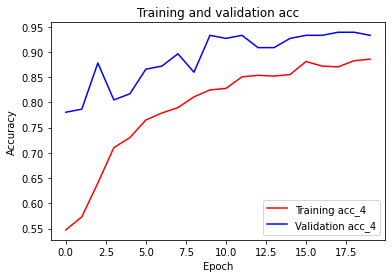

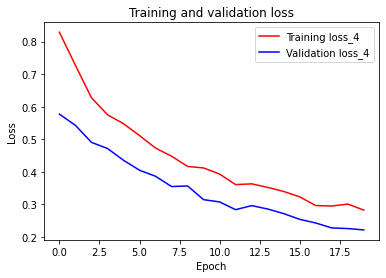

In [61]:
#Graphing our training and validation
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc4, 'r', label='Training acc_4')
plt.plot(epochs, val_acc4, 'b', label='Validation acc_4')
plt.title('Training and validation acc')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss4, 'r', label='Training loss_4')
plt.plot(epochs, val_loss4, 'b', label='Validation loss_4')
plt.title('Training and validation loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [62]:
#Model evaluation on testing set
model4.evaluate(test_data4, test_labels4)

206/206 [==============================] - 0s 160us/step


[0.5879046618938446, 0.6601941585540771]

In [63]:
#Classification metrics and confussion matrix
print('test data', test_data4)
preds4 = np.round(model4.predict(test_data4),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds4)

test data [[[[0.078134   0.         0.         ... 0.         1.1874962
    0.        ]
   [0.41883126 0.         0.         ... 0.         0.9182231
    0.        ]
   [1.441164   0.         0.43633756 ... 0.07787611 0.77222276
    0.        ]
   [0.7430471  0.         0.05845895 ... 0.         0.9239475
    0.        ]]

  [[0.         0.         0.15536386 ... 0.         1.0035914
    0.        ]
   [1.2744863  0.         0.7193092  ... 0.         0.2836828
    0.        ]
   [2.0711021  0.         0.82883424 ... 0.13840789 0.63107646
    0.        ]
   [1.4677839  0.         0.4925207  ... 0.         0.94388175
    0.        ]]

  [[0.46162793 0.         0.307761   ... 0.         0.3788005
    0.        ]
   [0.78380907 0.         0.55974853 ... 0.         0.
    0.        ]
   [0.40790197 0.         0.         ... 0.         0.16822714
    0.        ]
   [0.         0.         0.05005324 ... 0.         0.18655479
    0.        ]]

  [[0.42519373 0.         0.         ... 0.       

In [64]:
plants = ['Healthy', 'Late_Blight']
classification_metrics4 = metrics.classification_report(test_labels4, preds4, target_names=plants )
print(classification_metrics4)

              precision    recall  f1-score   support

     Healthy       0.97      0.33      0.49       103
 Late_Blight       0.60      0.99      0.74       103

   micro avg       0.66      0.66      0.66       206
   macro avg       0.78      0.66      0.62       206
weighted avg       0.78      0.66      0.62       206
 samples avg       0.66      0.66      0.66       206



In [ ]:
Model 5

In [78]:
#Dimensions 
img_width, img_height = 150, 150
   
#Create a bottleneck file
top_model_weights_path = 'vgg19_Exp5.h5' 

# loading up our datasets
train_data_dir5 = r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp5\Training_Exp5'
validation_data_dir5 =  r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp5\Validation_Exp5'
test_data_dir5 =r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Testing'

   
# number of epochs to train top model  
epochs = 65 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size5 = 32

In [79]:
#Creating weight with vgg19
#__this can take few minitues to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen_2.flow_from_directory(  
     train_data_dir5,  
     target_size=(img_width, img_height),  
     batch_size=batch_size5,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size5))  
   
bottleneck_features_train = vgg19.predict_generator(generator, predict_size_train)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp5\bottleneck_features_train_5.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 656 images belonging to 2 classes.
Time:  0:04:44.778016


In [80]:
#__this can take few minitues to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir5,  
     target_size=(img_width, img_height),  
     batch_size=batch_size5,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size5))  
   
bottleneck_features_validation = vgg19.predict_generator(  
     generator, predict_size_validation)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp5\bottleneck_features_validation_5.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 164 images belonging to 2 classes.
Time:  0:01:08.198037


In [81]:
#__this can take few miniutes to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir5,  
     target_size=(img_width, img_height),  
     batch_size=batch_size5,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size5))  
   
bottleneck_features_test = vgg19.predict_generator(  
     generator, predict_size_test)  
   
np.save(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp5\bottleneck_features_test_5.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 206 images belonging to 2 classes.
Time:  0:01:27.235117


In [82]:
#training data
generator_top = datagen_2.flow_from_directory(  
         train_data_dir5,  
         target_size=(img_width, img_height),  
         batch_size=batch_size5,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data5 = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp5\bottleneck_features_train_5.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels5 = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels5 = to_categorical(train_labels5, num_classes=num_classes)

Found 656 images belonging to 2 classes.


In [83]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir5,  
         target_size=(img_width, img_height),  
         batch_size=batch_size5,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data5 = np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp5\bottleneck_features_validation_5.npy')  
   

validation_labels5 = generator_top.classes  
validation_labels5 = to_categorical(validation_labels5, num_classes=num_classes)

Found 164 images belonging to 2 classes.


In [84]:
#Testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir5,  
         target_size=(img_width, img_height),  
         batch_size=batch_size5,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data5= np.load(r'C:\Users\Natnael\Documents\New_Data\Orginal_Data\Crossvalidation\80-20\Experiments\Exp5\bottleneck_features_test_5.npy')  
   

test_labels5 = generator_top.classes  
test_labels5 = to_categorical(test_labels5, num_classes=num_classes)

Found 206 images belonging to 2 classes.


In [86]:
#Training the model
#This is the model architecture
from tensorflow.keras import regularizers
start = datetime.datetime.now()
model5 = Sequential()  
model5.add(Flatten(input_shape=train_data.shape[1:]))  
model5.add(Dense(100, activation='relu'))  
model5.add(Dropout(0.5))  
model5.add(Dense(100, activation='relu'))  
model5.add(Dropout(0.5))
model5.add(Dense(2, activation='softmax'))  

model5.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])  

history5 = model5.fit(train_data5, train_labels5,  
      epochs=20,
      batch_size=batch_size5,  
      validation_data=(validation_data5, validation_labels5))  

model5.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model5.evaluate(  
 validation_data5, validation_labels5, batch_size=batch_size5, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 656 samples, validate on 164 samples
Epoch 1/20
656/656 [==============================] - 1s 812us/step - loss: 0.8716 - acc: 0.5213 - val_loss: 0.6133 - val_acc: 0.7561
Epoch 2/20
656/656 [==============================] - 0s 583us/step - loss: 0.7761 - acc: 0.5305 - val_loss: 0.5482 - val_acc: 0.9207
Epoch 3/20
656/656 [==============================] - 0s 638us/step - loss: 0.7402 - acc: 0.5777 - val_loss: 0.5236 - val_acc: 0.9268
Epoch 4/20
656/656 [==============================] - 0s 612us/step - loss: 0.6367 - acc: 0.6372 - val_loss: 0.4938 - val_acc: 0.9451
Epoch 5/20
656/656 [==============================] - 0s 574us/step - loss: 0.6133 - acc: 0.6768 - val_loss: 0.4657 - val_acc: 0.9390
Epoch 6/20
656/656 [==============================] - 0s 640us/step - loss: 0.6131 - acc: 0.6707 - val_loss: 0.4477 - val_acc: 0.9207
Epoch 7/20
656/656 [==============================] - 0s 617us/step - loss: 0.5720 - acc: 0.7180 - val_loss: 0.4082 - val_acc: 0.9634
Epoch 8/20
656/6

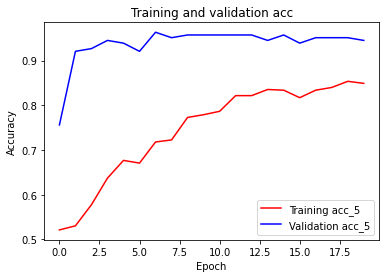

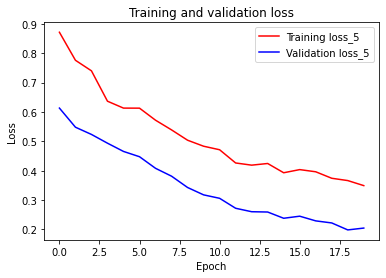

In [87]:
#Graphing our training and validation
acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc5, 'r', label='Training acc_5')
plt.plot(epochs, val_acc5, 'b', label='Validation acc_5')
plt.title('Training and validation acc')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss5, 'r', label='Training loss_5')
plt.plot(epochs, val_loss5, 'b', label='Validation loss_5')
plt.title('Training and validation loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [88]:
#Model evaluation on testing set
model5.evaluate(test_data5, test_labels5)

206/206 [==============================] - 0s 165us/step


[0.6214713444119518, 0.6456310749053955]

In [89]:
#Classification metrics and confussion matrix
print('test data', test_data5)
preds5 = np.round(model5.predict(test_data5),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds5)

test data [[[[0.078134   0.         0.         ... 0.         1.1874962
    0.        ]
   [0.41883126 0.         0.         ... 0.         0.9182231
    0.        ]
   [1.441164   0.         0.43633756 ... 0.07787611 0.77222276
    0.        ]
   [0.7430471  0.         0.05845895 ... 0.         0.9239475
    0.        ]]

  [[0.         0.         0.15536386 ... 0.         1.0035914
    0.        ]
   [1.2744863  0.         0.7193092  ... 0.         0.2836828
    0.        ]
   [2.0711021  0.         0.82883424 ... 0.13840789 0.63107646
    0.        ]
   [1.4677839  0.         0.4925207  ... 0.         0.94388175
    0.        ]]

  [[0.46162793 0.         0.307761   ... 0.         0.3788005
    0.        ]
   [0.78380907 0.         0.55974853 ... 0.         0.
    0.        ]
   [0.40790197 0.         0.         ... 0.         0.16822714
    0.        ]
   [0.         0.         0.05005324 ... 0.         0.18655479
    0.        ]]

  [[0.42519373 0.         0.         ... 0.       

In [90]:
plants = ['Healthy', 'Late_Blight']
classification_metrics5 = metrics.classification_report(test_labels5, preds5, target_names=plants )
print(classification_metrics5)

              precision    recall  f1-score   support

     Healthy       0.97      0.30      0.46       103
 Late_Blight       0.59      0.99      0.74       103

   micro avg       0.65      0.65      0.65       206
   macro avg       0.78      0.65      0.60       206
weighted avg       0.78      0.65      0.60       206
 samples avg       0.65      0.65      0.65       206



In [91]:
print('Model one-Classification Metrics')
print(classification_metrics)
print('Model two-Classification Metrics')
print(classification_metrics2)
print('Model three-Classification Metrics')
print(classification_metrics3)
print('Model four-Classification Metrics')
print(classification_metrics4)
print('Model five-Classification Metrics')
print(classification_metrics5)

Model one-Classification Metrics
              precision    recall  f1-score   support

     Healthy       0.97      0.27      0.42       103
 Late_Blight       0.58      0.99      0.73       103

   micro avg       0.63      0.63      0.63       206
   macro avg       0.77      0.63      0.58       206
weighted avg       0.77      0.63      0.58       206
 samples avg       0.63      0.63      0.63       206

Model two-Classification Metrics
              precision    recall  f1-score   support

     Healthy       1.00      0.27      0.43       103
 Late_Blight       0.58      1.00      0.73       103

   micro avg       0.64      0.64      0.64       206
   macro avg       0.79      0.64      0.58       206
weighted avg       0.79      0.64      0.58       206
 samples avg       0.64      0.64      0.64       206

Model three-Classification Metrics
              precision    recall  f1-score   support

     Healthy       0.86      0.35      0.50       103
 Late_Blight       0.59     

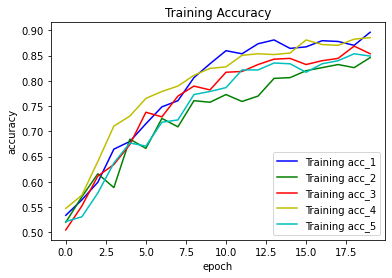

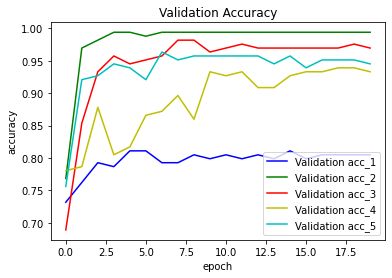

In [92]:
#Plotting the training AND validation graph for all models
import matplotlib.pyplot as plt
import keras

acc = history.history['acc']
val_acc = history.history['val_acc']
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc_1')
plt.plot(epochs, acc2, 'g', label='Training acc_2')
plt.plot(epochs, acc3, 'r', label='Training acc_3')
plt.plot(epochs, acc4, 'y', label='Training acc_4')
plt.plot(epochs, acc5, 'c', label='Training acc_5')
plt.title('Training Accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, val_acc, 'b', label='Validation acc_1')
plt.plot(epochs, val_acc2, 'g', label='Validation acc_2')
plt.plot(epochs, val_acc3, 'r', label='Validation acc_3')
plt.plot(epochs, val_acc4, 'y', label='Validation acc_4')
plt.plot(epochs, val_acc5, 'c', label='Validation acc_5')
plt.title('Validation Accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()